<a href="https://colab.research.google.com/github/henritomas/CoE197-Z-Tomas-DL-Experiments/blob/master/orthonormal_transformer_positional_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orthonormalized 16 x 16 Positional Encoding
- Homework # 1 for EE 298-M
- Submitted by Henri Marcelo B. Tomas
-  github.com/henritomas

## i. Requirements: 
- Only use Python, Numpy for implementation
- I only used matplotlib for the visualization, and math module for value of **pi**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math # Only used this for accurate pi value

## ii. Functions to check if Orthogonal, Normal, or Orthonormal

In [2]:
# Check if basis vectors (row vectors / token position vectors) are orthogonal

def is_orthogonal(U):

    V = U @ np.transpose(U)
    #print(V)
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            if i == j: continue

            if not np.isclose(V[i,j], 0.0): #Is V[i,j] i!=j approx. equal to 0?
                return False

    return True

def is_normal(U):
    for i in range(U.shape[1]):
        u_norm = np.dot(U[:,i] , U[:,i])

        if not np.isclose(u_norm, 1.0): #Is u_norm approx. equal to 1?
            return False

    return True

def is_orthonormal(U):
    if is_orthogonal(U) and is_normal(U):
        return True

    return False

## iii. Gram-Schmidt implementation in Numpy and Python
- **Classical Gram-Schmidt** sometimes fails for complex matrices, and is sometimes computationally inaccurate
- **Modified Gram-Schmidt** is also implemented to solve this issue

In [3]:
# Gram Schmidt and Modified Gram Schmidt with example 3 x 3 basis (row) vectors

def gs_scalar(u2, v1):
    return np.dot(u2, v1) / np.dot(v1, v1)

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        print('Norm is 0, returning input')
        return v

    return v / norm

def gram_schmidt(U):

    V = []

    for i in range(len(U)):

        temp_vec = U[i]

        for vi in V:

            subtract_vec = gs_scalar(U[i], vi) * vi
            temp_vec = temp_vec - subtract_vec

        V.append(normalize(temp_vec))
    return np.vstack(V)

''' '''
def modified_gram_schmidt(U):

    V = []
    Q = []
    n = len(U)

    for j in range(n):

        V.append(U[j])

    for j in range(n):
        Q.append(normalize(V[j]))

        for k in range(j+1, n):
            V[k] = V[k] - (gs_scalar(V[k], Q[j]) * Q[j]) 

    return np.vstack(Q)

def numpy_GS(U):
    
    q, r = np.linalg.qr(U)
    return q

r = np.random.rand(5,5)
ans_matrix = modified_gram_schmidt(r)        
print(ans_matrix)

print(is_orthogonal(ans_matrix))
print(is_normal(ans_matrix))
print(is_orthonormal(ans_matrix))

[[ 0.16665721  0.86385487  0.42513948  0.1617721   0.13808095]
 [ 0.46761163 -0.1911263  -0.04541476 -0.07462894  0.85859078]
 [-0.21633375 -0.29020569  0.29562798  0.87215621  0.1446652 ]
 [ 0.76879214  0.0086539  -0.33001433  0.37209881 -0.4018915 ]
 [ 0.34018097 -0.3645974   0.78796483 -0.26295692 -0.24761003]]
True
True
True


## iv. Numpy's built in Gram-Schmidt: QR decomp

Numpy also provides their own function for getting orthonormal matrices, which is the QR factorization. We can see that the answer for the sample 5x5 matrix is the same for our implemented MGS. Take Note that the row vectors are the basis vectors in these examples. 

In [4]:
ans_matrix, _ = np.linalg.qr(np.transpose(r)) 
ans_matrix = np.transpose(ans_matrix)       
print(ans_matrix)

print(is_orthogonal(ans_matrix))
print(is_normal(ans_matrix))
print(is_orthonormal(ans_matrix))

[[-0.16665721 -0.86385487 -0.42513948 -0.1617721  -0.13808095]
 [ 0.46761163 -0.1911263  -0.04541476 -0.07462894  0.85859078]
 [ 0.21633375  0.29020569 -0.29562798 -0.87215621 -0.1446652 ]
 [-0.76879214 -0.0086539   0.33001433 -0.37209881  0.4018915 ]
 [-0.34018097  0.3645974  -0.78796483  0.26295692  0.24761003]]
True
True
True


## 1. Homework Proper: The Positional Encoding
- Domain is distributed between 0 and 2pi, 8 identical values each for the intertwined sin and cosine to make 16-dim when combined
- Values are scaled by 1/#_of_tokens so when the positional vector is multiplied, domain is kept between 0 and **2pi** and there will be no repeating vectors

(1, 16, 16)


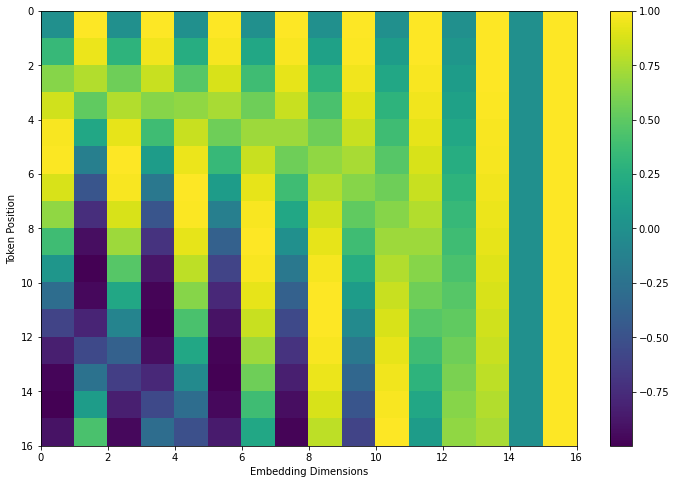

In [5]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
# Modified to make the domain distributed between 0 and 2pi
# x = [0, 1/4 pi, 2/4 pi, ..., 7/4 pi] is 8 values overall 

def positional_encoding(position, d_model):
  
  # Get values between 0 and 2pi, multiplied by 1/16 to compensate for token-position scaling
  pos_scale = 1/position
  pos_vector = np.arange(position)[:, np.newaxis]
  
  # I want to flip the 0 to 2pi domain (2pi to 0 instead) so it looks better
  x = np.linspace(0, (7/4)*math.pi, num=8) * pos_scale
  x = np.flip(np.repeat(x, 2)) # repeat x values twice to intertwine sin and cos
  x = x[np.newaxis, :]
  x = pos_vector * x


  pos_encoding = np.zeros((position, d_model))

  # apply sin to even indices in the array; 2i
  pos_encoding[:, 0::2] = np.sin(x[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  pos_encoding[:, 1::2] = np.cos(x[:, 1::2])
    
  pos_encoding = pos_encoding[np.newaxis, ...]
    
  return pos_encoding

tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

## 2. Are these Basis Vectors Ortho(gonal/normal)? 
Taking the column vectors (the dimensions) of the 16x16 positional encoding as basis vectors for the positional encoding, 

we check if orthogonal or orthonormal:


In [6]:
#Take the basis column vectors, transform to rows so we can plug into my functions
basis = pos_encoding[0]

print('Orthogonal: ', is_orthogonal(basis))
print('Normalized: ', is_normal(basis))
print('Orthonormal:', is_orthonormal(basis))

Orthogonal:  False
Normalized:  False
Orthonormal: False


## 3. Apply Gram-Schmidt
The positional encoding as basis vectors are not ortho(gonal/normal), we fix this by applying the MGS algorithm. For some reason, the results of numpy's GS and my MGS differ, with numpy's GS being successful in orthonormalizing the 16x16 matrix. 

A visualization is also supplied:

Orthogonal:  True
Normalized:  True
Orthonormal: True


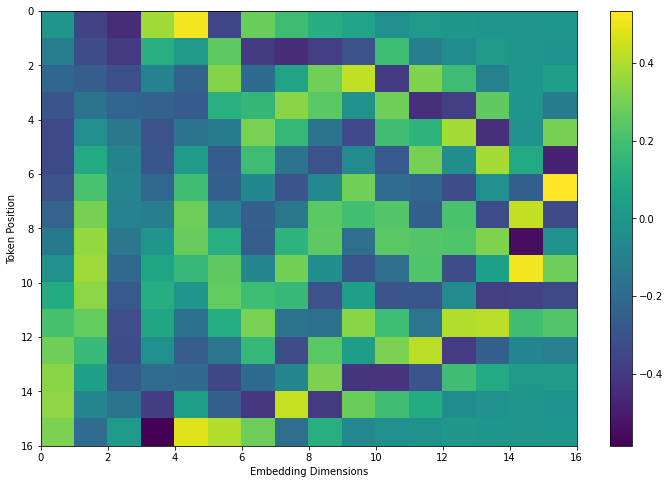

In [7]:
# ope stands for Orthonormal_Position_Encoding
ope = numpy_GS(basis)

print('Orthogonal: ', is_orthogonal(ope))
print('Normalized: ', is_normal(ope))
print('Orthonormal:', is_orthonormal(ope))

# Show 16x16 positional encoding 
plt.figure(figsize=(12,8))
plt.pcolormesh(ope, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

## 4. Side-by-Side Comparison

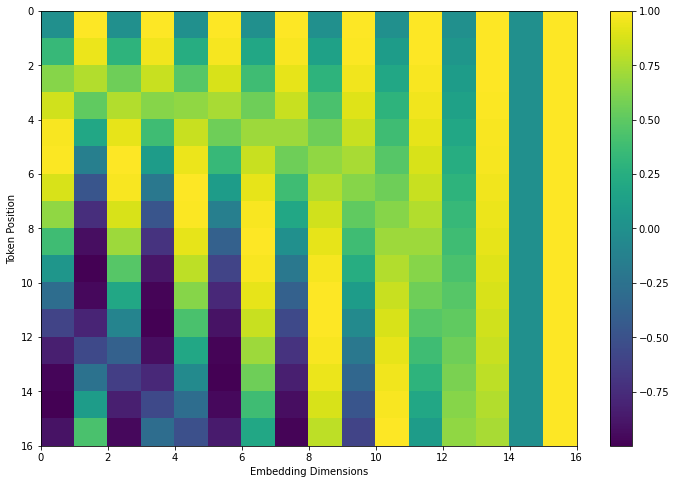

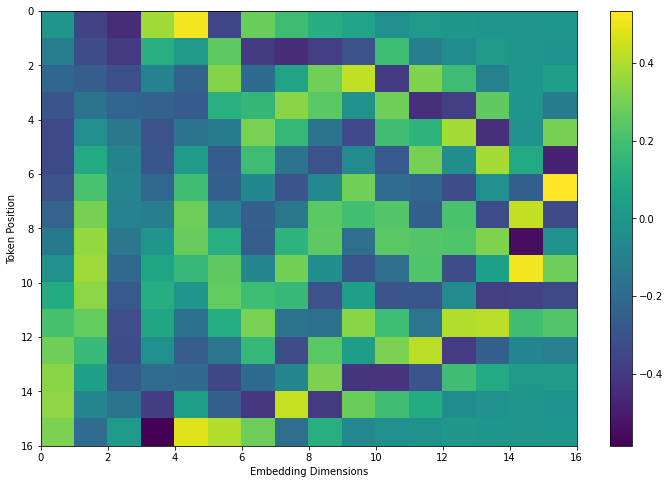

In [8]:
# Show 16x16 positional encoding 
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

plt.figure(figsize=(12,8))
plt.pcolormesh(ope, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()